# Global renewable energy consumption


## Analyse de la consommation d'EnR à l'échelle mondiale - focus sur l'Europe et la France 
---

## Introduction

Les données ont été récupérés sur le site our world in data : https://ourworldindata.org/renewable-energy

Il s'agit des valeurs de consomation d'EnR dans le monde sur plus d'un siècle.

Sources
- TRADITIONAL BIOFUELS (VACLAV SMIL, 2017)
- Variable time span	1800 – 2017
- Data published by Vaclav Smil (2017). Energy Transitions: Global and National Perspectives. & BP Statistical Review of World Energy.
- Link http://vaclavsmil.com/2016/12/14/energy-transitions-global-and-national-perspectives-second-expanded-and-updated-edition/ ; https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html

---
## 1. Exploration des données / sélection / nettoyage

Cette étape consiste à se familiariser avec les données, comprendre les colonnes, ce que couvre les données. Puis quelles sont les valeurs manquantes ou celles qui nous intéressent vraiment ? On prépare la data pour ensuite l'exploiter. NOus allons utiliser pandas qui permet de traiter des données numériques et des chaines de caractères pour des données qui ne sont pas trop volumineuses (notre fichier fait moins de 1 mega)

In [1]:
# import de toutes les bibliothèques nécessaires

# pour la manipulation de données 
import numpy as np
import pandas as pd

# pour les graphiques
import seaborn as sns
import matplotlib.pyplot as plt

# change l'affichage du nbre de cols
pd.options.display.max_columns = 20

# enlève les warnings en rose
import warnings
warnings.filterwarnings("ignore")

1er aperçu sous forme de tableau afin de se rendre compte des colonnes et de leurs significiations

In [2]:
# charge le fichiers dans un dataframe df et affiche les 5 premières lignes
df = pd.read_csv("renewable-energy-consumption.csv")
df.head()

,Entity,Code,Year,Traditional biofuels (terrawatt-hours),Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
0,Africa,NaN,1965,NaN,14.278806,0.0,0.0,0.0
1,Africa,NaN,1966,NaN,15.649049,0.0,0.0,0.0
2,Africa,NaN,1967,NaN,16.158333,0.0,0.0,0.0
3,Africa,NaN,1968,NaN,18.622983,0.0,0.0,0.0
4,Africa,NaN,1969,NaN,21.582897,0.0,0.0,0.0


Le bas du tableau permet de se faire se rendre compte que les données sont similaires partout et couvrent des années jusqu'à 2018

In [3]:
# affiche les 5 dernières lignes
df.tail()

,Entity,Code,Year,Traditional biofuels (terrawatt-hours),Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
5103,World,OWID_WRL,2014,11220.06442,3883.143443,197.910508,712.031697,502.158919
5104,World,OWID_WRL,2015,11111.11111,3884.417357,260.739219,831.384507,536.466244
5105,World,OWID_WRL,2016,11003.21580,4017.743773,328.378114,956.873542,556.623356
5106,World,OWID_WRL,2017,10895.32049,4065.443127,453.517657,1127.989587,584.975827
5107,World,OWID_WRL,2018,NaN,4193.104151,584.630918,1269.953375,625.805362


De quelle manière les grandeurs sont représentées ? Les valeurs numériques sont représentées de la bonne manière :

In [4]:
# affiche les types des colonnes object = string, int = entier, float = valeur num à virgule
df.dtypes

Entity                                     object
Code                                       object
Year                                        int64
Traditional biofuels (terrawatt-hours)    float64
Hydropower (terawatt-hours)               float64
Solar (terawatt-hours)                    float64
Wind (terawatt-hours)                     float64
Other renewables (terawatt-hours)         float64
dtype: object

Notre enregistrement possède 5000 lignes environ pour 8 colonnes

In [5]:
# taille du dataframe df
df.shape

(5108, 8)

On constate que les valeurs sont données par pays, par continents (Africa, Asia Pacific, Europe, North America, South & Central America)  et pour le monde :

In [6]:
# nbre de valeurs uniques dans la colonne entity
df['Entity'].unique()

array(['Africa', 'Algeria', 'Argentina', 'Asia Pacific', 'Australia',
       'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium',
       'Brazil', 'Bulgaria', 'CIS', 'Canada', 'Central America', 'Chile',
       'China', 'Colombia', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Eastern Africa', 'Ecuador', 'Egypt', 'Estonia',
       'Europe', 'Europe (other)', 'Finland', 'France', 'Germany',
       'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg',
       'Macedonia', 'Malaysia', 'Mexico', 'Middle Africa', 'Middle East',
       'Morocco', 'Netherlands', 'New Zealand', 'North America', 'Norway',
       'Oman', 'Other Asia & Pacific', 'Other CIS', 'Other Caribbean',
       'Other Middle East', 'Other Northern Africa',
       'Other South America', 'Other Southern Africa', 'Pakistan', 'Peru',
       'Philippines', 'Poland', 'Po

Il n'y a pas le même nombre d'enregistrements selon les pays :

In [7]:
df['Entity'].value_counts()

World                    71
Middle East              54
Ireland                  54
Denmark                  54
United States            54
Sri Lanka                54
India                    54
United Arab Emirates     54
Colombia                 54
Algeria                  54
Iraq                     54
Vietnam                  54
Philippines              54
Saudi Arabia             54
Other Caribbean          54
Central America          54
Kuwait                   54
Qatar                    54
Hungary                  54
Slovakia                 54
Malaysia                 54
Belgium                  54
Eastern Africa           54
Other Northern Africa    54
Thailand                 54
Poland                   54
Indonesia                54
Other Middle East        54
Turkey                   54
Finland                  54
                         ..
Chile                    54
Argentina                54
Switzerland              54
Canada                   54
Austria             

Quels sont les annees dont nous possédons un enregistrement :

In [8]:
# nbre de valeurs uniques dans la colonne entity
print(sorted(df['Year'].unique()))

[1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


De la même manière toutes les années ne possèdent pas le même nombre de lignes ou d'enregistrements :

In [9]:
# selectionne seulement la colonne année et donne le nombre de lines par valeurs distinctes avec la méthode value count :
df['Year'].value_counts()

2015    99
1998    99
1990    99
2011    99
2013    99
2009    99
2005    99
2001    99
1997    99
1993    99
2016    99
2012    99
2008    99
2004    99
2000    99
1996    99
1992    99
1994    99
2017    99
2002    99
2007    99
2006    99
2018    99
2014    99
2010    99
1991    99
1999    99
2003    99
1995    99
1988    96
        ..
1965    87
1969    87
1973    87
1977    87
1979    87
1966    87
1982    87
1978    87
1974    87
1975    87
1970    87
1971    87
1967    87
1960     1
1820     1
1840     1
1860     1
1880     1
1900     1
1920     1
1940     1
1870     1
1890     1
1810     1
1830     1
1850     1
1950     1
1930     1
1910     1
1800     1
Name: Year, Length: 71, dtype: int64

A-t-on le même nombre d'enregistrement à partir des années 90 ? oui :

In [10]:
# selectionne dans le DF que les lignes pour des années supérieures à 1990, et pour la colonne Year -> value count
df[df['Year'] > 1990]['Year'].value_counts()

2017    99
2015    99
1994    99
1996    99
1998    99
2000    99
2002    99
2004    99
2006    99
2008    99
2010    99
2012    99
2014    99
2016    99
2018    99
1991    99
1993    99
1995    99
1997    99
1999    99
2001    99
2003    99
2005    99
2007    99
2009    99
2011    99
2013    99
1992    99
Name: Year, dtype: int64

Avant 70 toutes les années ne sont pas représentés. De plus a-t-on des données fiables pour années très reculées / anciennes ? on peut en douter mais pour s'en assurer il faudrait mener une enquête sur la provenance des données , comment elles ont été collectés etc... . Ici, on garde donc les infos qu'à partir de 1970 pour notre analyse :

In [11]:
# reaffecte au dataframe que les lignes dont l'année est supérieure à 1970
df = df[df['Year'] >= 1970]

# pour vérifier regardons si le nbre de lignes a bien diminué :
df.shape

(4656, 8)

Malgrès notre 1ère sélection sur les années, il reste toujours des données inconnues. Nombre de valeurs manquantes "Nan" dans nos données par colonne : 

In [12]:
df.isnull().sum()

Entity                                       0
Code                                       916
Year                                         0
Traditional biofuels (terrawatt-hours)    4608
Hydropower (terawatt-hours)                  0
Solar (terawatt-hours)                       0
Wind (terawatt-hours)                        0
Other renewables (terawatt-hours)           49
dtype: int64

## Recherche plus précise des valeurs manquantes

Au niveau mondial il ne manque qu'une valeur

In [13]:
df[df['Entity'] == 'World'].isnull().sum()

Entity                                    0
Code                                      0
Year                                      0
Traditional biofuels (terrawatt-hours)    1
Hydropower (terawatt-hours)               0
Solar (terawatt-hours)                    0
Wind (terawatt-hours)                     0
Other renewables (terawatt-hours)         0
dtype: int64

Créons la liste des pays d'europe pour s'en servir dans notre analyse

In [14]:
pays_europe = [
    'Austria',
    'Belgium',
    'Bulgaria',
    'Switzerland',
    'Cyprus',
    'Czech Republic',
    'Germany',
    'Denmark',
    'Estonia',
    'Spain',
    'Finland',
    'France',
    'Greece',
    'United Kingdom',
    'Hungary',
    'Croatia',
    'Ireland',
    'Italy',
    'Lithuania',
    'Luxembourg',
    'Latvia',
    'Norway',
    'Netherlands',
    'Poland',
    'Portugal',
    'Romania',
    'Sweden',
    'Slovenia',
    'Slovakia'
]

Voyons plus en détails où se situent les valeurs manquantes pour les pays européens, seuls le biofuel possède des valeurs manquantes :

In [15]:
# boucle sur les pays
for p in pays_europe:
    print(p)
    # affiche les valeurs manquantes par pays
    print(df[df['Entity'] == p].isnull().sum())
    # saut de ligne pour l'affichage
    print("\n")

Austria
Entity                                     0
Code                                       0
Year                                       0
Traditional biofuels (terrawatt-hours)    49
Hydropower (terawatt-hours)                0
Solar (terawatt-hours)                     0
Wind (terawatt-hours)                      0
Other renewables (terawatt-hours)          0
dtype: int64


Belgium
Entity                                     0
Code                                       0
Year                                       0
Traditional biofuels (terrawatt-hours)    49
Hydropower (terawatt-hours)                0
Solar (terawatt-hours)                     0
Wind (terawatt-hours)                      0
Other renewables (terawatt-hours)          0
dtype: int64


Bulgaria
Entity                                     0
Code                                       0
Year                                       0
Traditional biofuels (terrawatt-hours)    49
Hydropower (terawatt-hours)                0


---

## 2. Data Analysis

Dans notre analyse nous allons commencer par une étude du monde entier, puis plus spécifiquement sur l'europe et un focus sur la france. Quelles sont les années pour lesquelles nous avons des enregistrements ?

Proportion des énergies renouvelables en 2018 pour le monde 

In [16]:
# exemple de pie chart / camembert avec pandas 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

# creation d'un dataframe temporaire avec juste la partie monde et l'année 2018
temp_df = df[(df['Year'] == 2018) & (df['Entity'] == 'World')]

# sauvegarde en ficher csv pour utilisation sous tableau
temp_df.to_csv("world_2018.csv")

# aperçu
temp_df.head()

,Entity,Code,Year,Traditional biofuels (terrawatt-hours),Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
5107,World,OWID_WRL,2018,NaN,4193.104151,584.630918,1269.953375,625.805362


In [17]:
# on enlève les colones qui ne servent à rien et dont on a pas d'infos
temp_df = temp_df.drop(columns = ["Entity", "Code", "Year", "Traditional biofuels (terrawatt-hours)"])
temp_df.head()

,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
5107,4193.104151,584.630918,1269.953375,625.805362


In [18]:
# transposée du dataframe pour avoir les infos dans la bonne forme
temp_df = temp_df.T
temp_df.head()

,5107
Hydropower (terawatt-hours),4193.104151
Solar (terawatt-hours),584.630918
Wind (terawatt-hours),1269.953375
Other renewables (terawatt-hours),625.805362


On constate que l'énergie "hydropower", provenant de l'eau (barrage, moulins etc...) est très prépondérante...

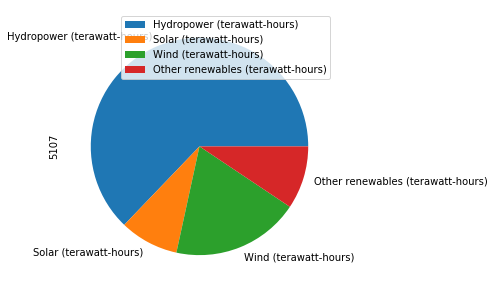

In [19]:
# creation du camembert
temp_df.plot.pie(y = temp_df.columns[0], figsize=(5, 5))

Evolution de la proportion des EnR consommées tous les 10 ans de 1970 à 2018: on constate une diversification des énergies EnR, l'hydro a toujours été la plus importantes et le reste traditionnellement  mais sa proportion diminue au profit de nouvelles sources : le solaire et l'éolien n'ont décollés que récemment ! 

année : 1970
année : 1980
année : 1990
année : 2000
année : 2010
année : 2018


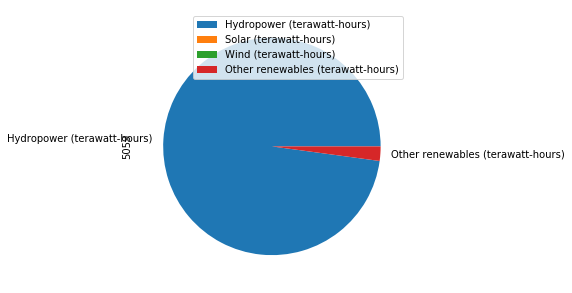

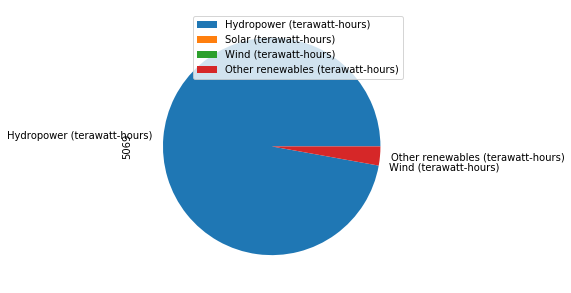

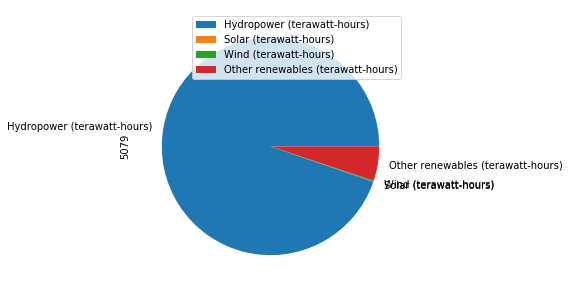

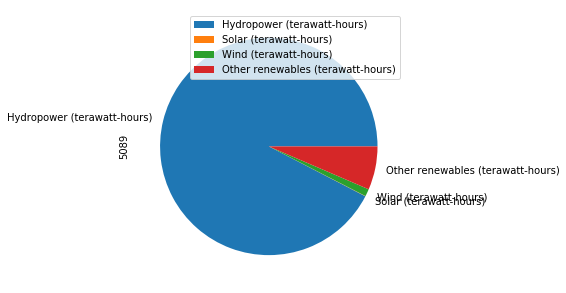

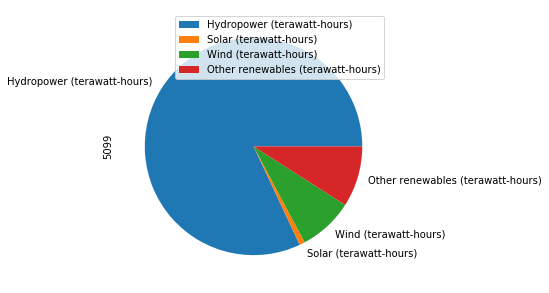

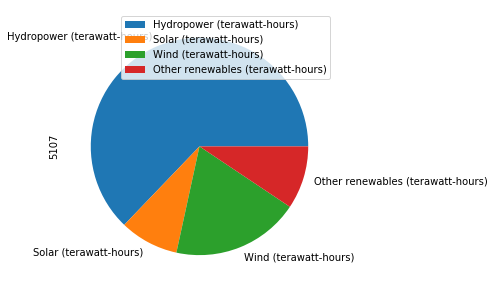

In [20]:
# boucle sur les années
for y in [1970, 1980, 1990, 2000, 2010, 2018]:
    # transformations similaires à ce qui a été fait précédemment pour avoir les infos dans la bonne forme :
    temp_df = df[(df['Year'] == y) & (df['Entity'] == 'World')]
    temp_df = temp_df.drop(columns = ["Entity", "Code", "Year", "Traditional biofuels (terrawatt-hours)"])
    temp_df = temp_df.T
    print('année :', y)
    temp_df.plot.pie(y = temp_df.columns[0], figsize=(5, 5))

Visualons cette évolution de manière plus simple avec un diagramme à barres empilées : 

In [21]:
# on ne garde que les années qui nous intéressent et la partie "monde"
temp_df = df[(df['Year'].isin([1970, 1980, 1990, 2000, 2010, 2018])) & (df['Entity'] == 'World')]

# on enlève les colonnes de façon analogue
temp_df = temp_df.drop(columns = ["Entity", "Code", "Traditional biofuels (terrawatt-hours)"])

# sauvegarde en ficher csv pour utilisation sous tableau
temp_df.to_csv("world_1970_a_2018.csv")

# on recrée un index avec les valeurs des années
temp_df = temp_df.set_index('Year')
temp_df.head()

,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
Year,,,,
1970,1174.560348,0.000000,0.000000,25.693196
1980,1698.609443,0.000000,0.010500,49.385364
1990,2161.048084,0.388295,3.632471,116.540330
2000,2654.703506,1.125407,31.420937,185.452381
2010,3432.948977,33.683157,341.614478,378.851479


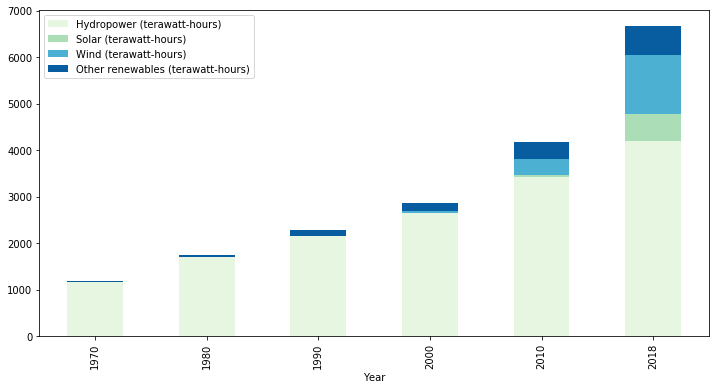

In [22]:
from matplotlib.colors import ListedColormap

# affichage du diagrame
temp_df.plot(kind='bar', # type à barres
             stacked=True, # empilées
              colormap=ListedColormap(sns.color_palette("GnBu", 10)), # définie la palette de couleur
              figsize=(12,6)) # la taille de la figure

### Proportion des EnR au fil du temps

Appliquons la meme chose par continent : on peut constater que la diversification des sources d'EnR se fait partout mais plus vite en Europe et en Amerique du Nord, l'Asie rattrape son retard. L'Afrique et l'Amérique du Sud tardent...

Africa
Asia Pacific
Europe
North America
South & Central America


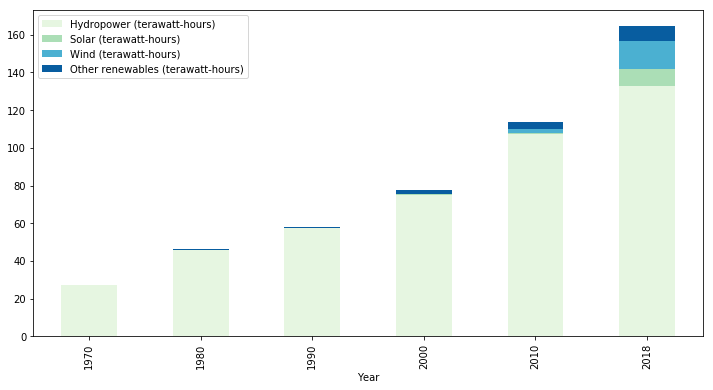

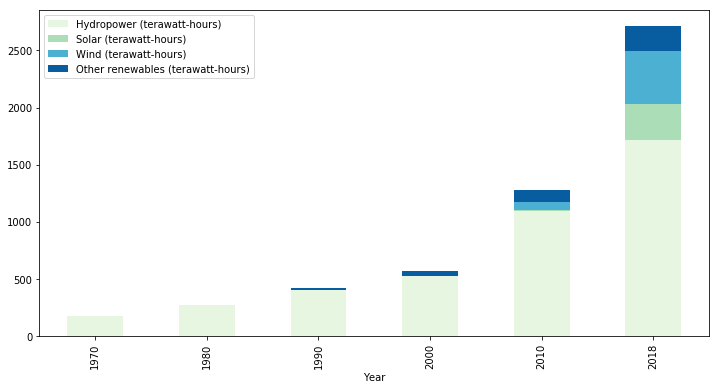

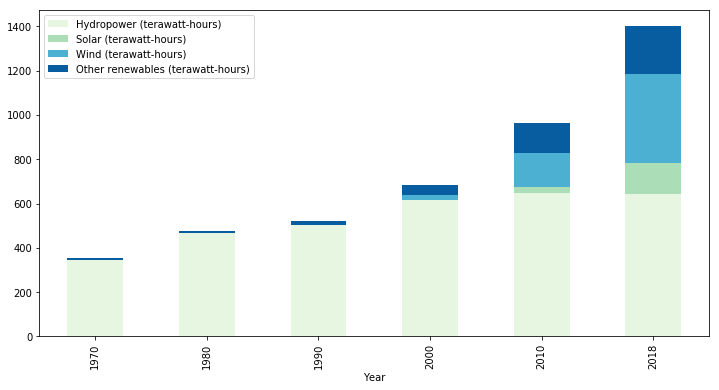

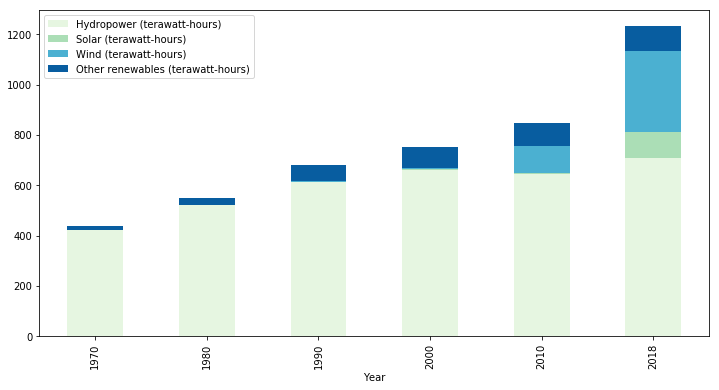

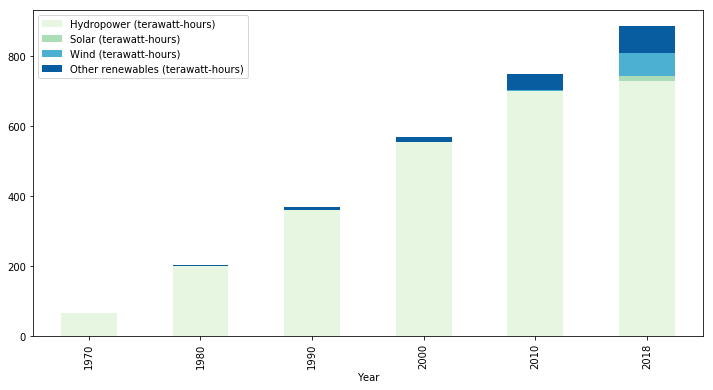

In [23]:
# liste des continents
continents = ["Africa", "Asia Pacific", "Europe", "North America", "South & Central America"]

for cont in continents:
    # on ne garde que les années qui nous intéressent et le continent
    temp_df = df[(df['Year'].isin([1970, 1980, 1990, 2000, 2010, 2018])) & (df['Entity'] == cont)]

    # on enlève les colonnes de façon analogue
    temp_df = temp_df.drop(columns = ["Entity", "Code", "Traditional biofuels (terrawatt-hours)"])

    # on recrée un index avec les valeurs des années
    temp_df = temp_df.set_index('Year')
    print(cont)
    # affichage du diagrame
    temp_df.plot(kind='bar', # type à barres
                 stacked=True, # empilées
                  colormap=ListedColormap(sns.color_palette("GnBu", 10)), # définie la palette de couleur
                  figsize=(12,6)) # la taille de la figure

### Evolution des EnR au fil du temps par continent

In [24]:
# liste des continents
continents = ["Africa", "Asia Pacific", "Europe", "North America", "South & Central America"]

# on ne garde que les années qui nous intéressent et le continent
temp_df = df[(df['Year'].isin([1970, 1980, 1990, 2000, 2010, 2018])) & (df['Entity'].isin(continents))]

# sauvegarde en ficher csv pour utilisation sous tableau
temp_df.to_csv("continents_1970_a_2018.csv")

temp_df.head()

,Entity,Code,Year,Traditional biofuels (terrawatt-hours),Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
5,Africa,NaN,1970,NaN,27.076287,0.000000,0.000000,0.000000
15,Africa,NaN,1980,NaN,46.030171,0.000000,0.000000,0.207000
25,Africa,NaN,1990,NaN,57.254659,0.000000,0.000000,0.732000
35,Africa,NaN,2000,NaN,75.245817,0.018400,0.176000,2.224423
45,Africa,NaN,2010,NaN,107.426833,0.223865,2.284146,3.788542


On constate que l'hydro power a toujours été massivement utilisé sur tous les continents mais que l'asie a commencé à vraiment exploiter ce potentiel de ressource à partir des années 2000. De même le solaire et l'éoliein n'ont vraiment commencés à être utiliser qu'à partir de 2010 mais avec une progression assez nette / dynamique surtout en asie. En revanche les autres EnR ne sont consommés qu'en Asie et en Europe...

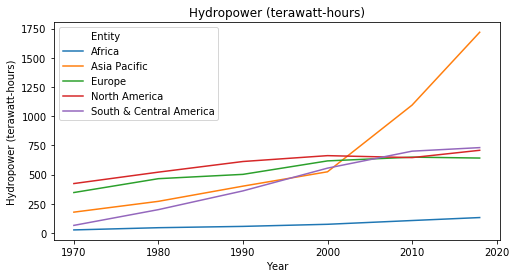

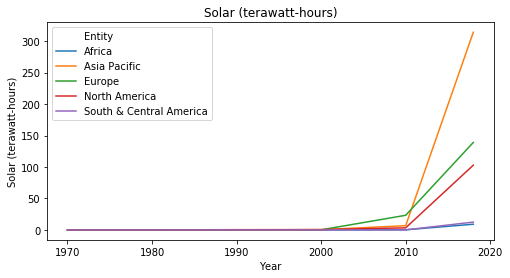

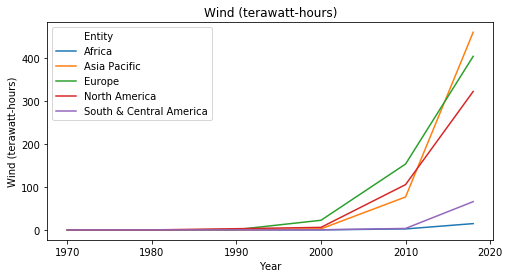

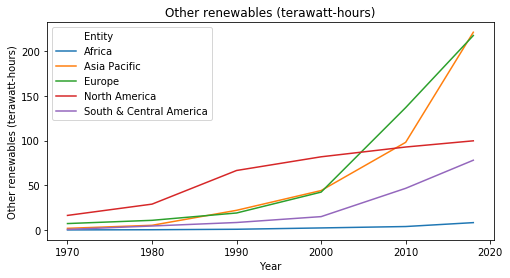

In [25]:
for c in ['Hydropower (terawatt-hours)', "Solar (terawatt-hours)", "Wind (terawatt-hours)", "Other renewables (terawatt-hours)"]:
    plt.figure(figsize=(8, 4))
    sns.lineplot(x="Year", 
                 y=c, 
                 hue="Entity",
                 data=temp_df)
    plt.title(c)

### Focus sur l'Europe

In [26]:
print(pays_europe)

['Austria', 'Belgium', 'Bulgaria', 'Switzerland', 'Cyprus', 'Czech Republic', 'Germany', 'Denmark', 'Estonia', 'Spain', 'Finland', 'France', 'Greece', 'United Kingdom', 'Hungary', 'Croatia', 'Ireland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Norway', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Slovakia']


Commencons par traiter les données et visualiser le tableau

In [27]:
# on ne garde que les années qui nous intéressent et le continent
temp_df = df[(df['Year'].isin([1970, 1980, 1990, 2000, 2010, 2018])) & (df['Entity'].isin(pays_europe))]

# on enlève les colonnes inutiles
temp_df = temp_df.drop(columns = ["Code", "Traditional biofuels (terrawatt-hours)"])

# on crée une colone avec la somme des Enr
temp_df['somme'] = temp_df["Hydropower (terawatt-hours)"] + \
            temp_df["Solar (terawatt-hours)"] + \
            temp_df["Wind (terawatt-hours)"] + \
            temp_df["Other renewables (terawatt-hours)"]

# sauvegarde en ficher csv pour utilisation sous tableau
temp_df.to_csv("europe_1970_a_2018.csv")

temp_df.head()

,Entity,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours),somme
275,Austria,1970,21.289700,0.000000,0.000000,0.000000,21.289700
285,Austria,1980,29.109900,0.000000,0.000000,0.000000,29.109900
295,Austria,1990,31.509000,0.000000,0.000000,1.142485,32.651485
305,Austria,2000,41.835651,0.003000,0.067000,1.528279,43.433930
315,Austria,2010,38.363418,0.088813,2.063914,4.463430,44.979575


En traçant le graphe on observe de grandes disparités : certains pays consomment toujours très peu d'EnR (il peut s'agit de petits pays ou "relativmeent" moins développés), et des pays qui ont très fortement misés sur les EnR depuis les années 2000

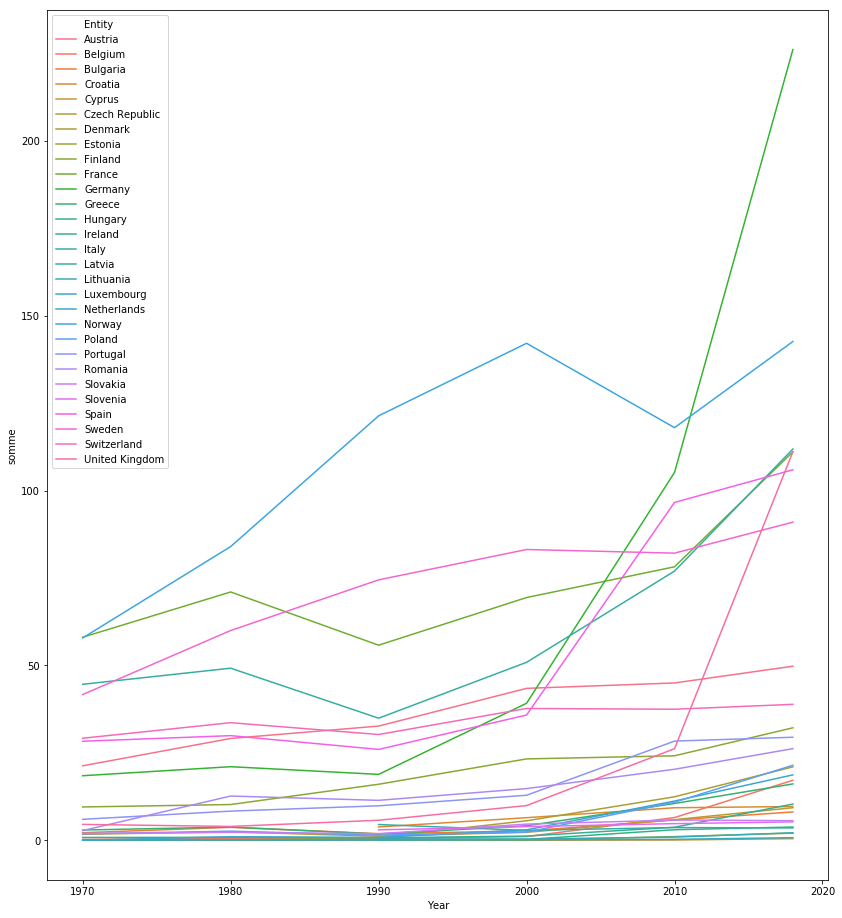

In [28]:
plt.figure(figsize=(14, 16))
sns.lineplot(x="Year", 
             y='somme', 
             hue="Entity",
             data=temp_df)

Si on distingue par type d'énergie, on retrouve les mêmes disparités :

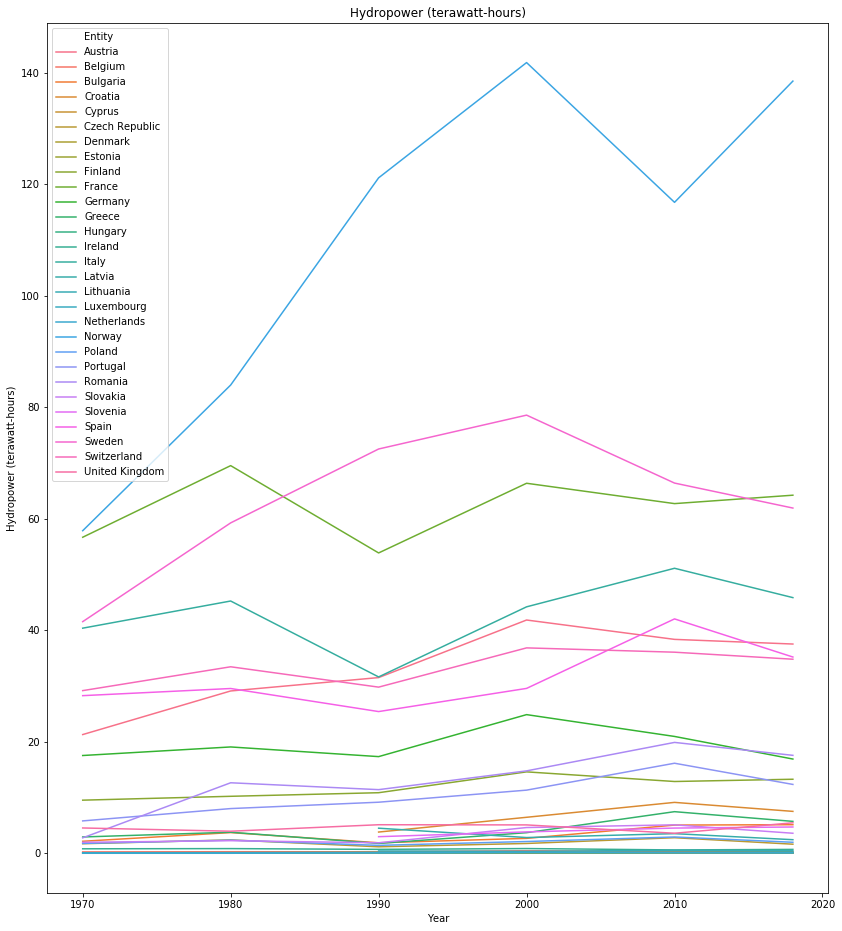

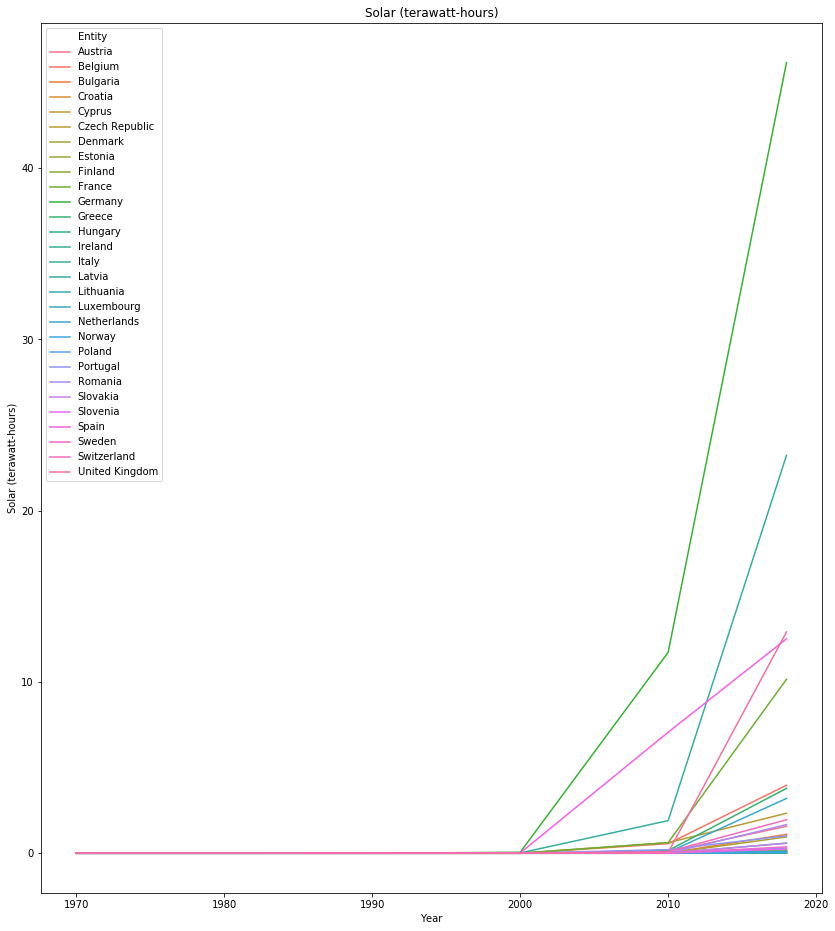

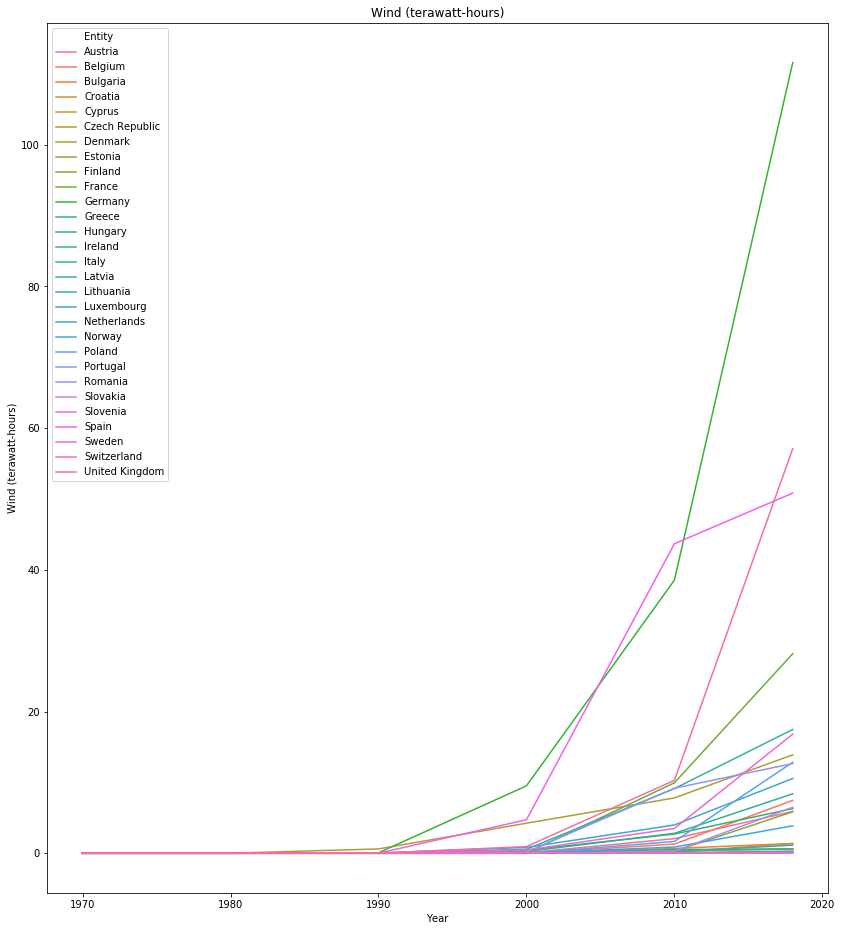

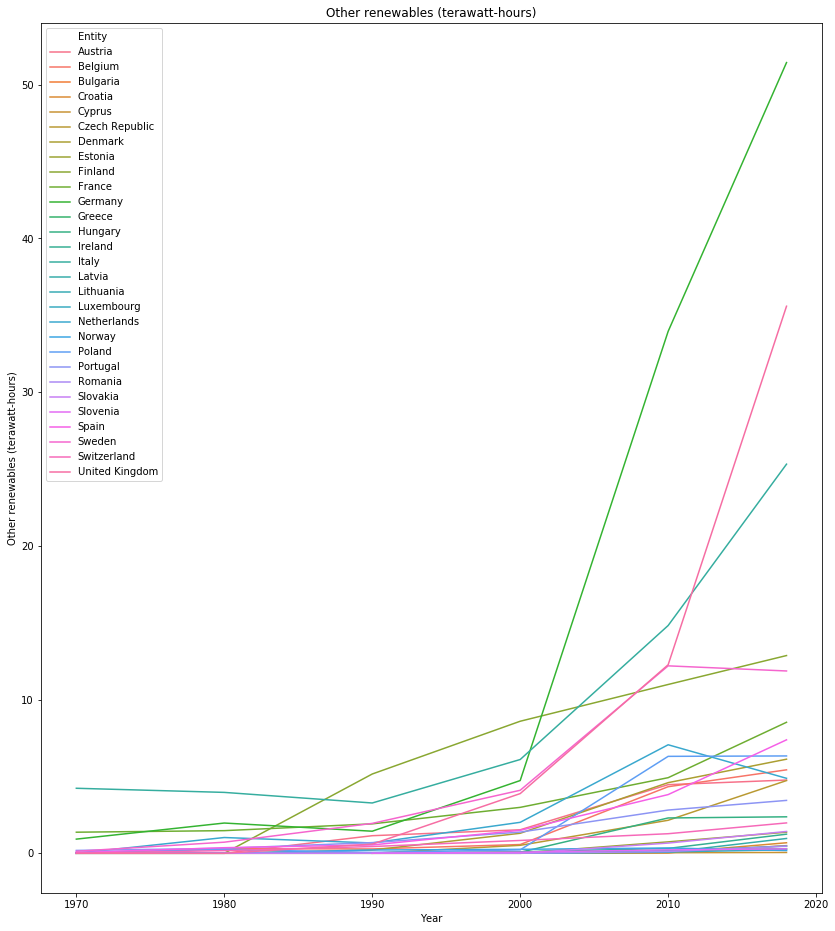

In [29]:
type_enr = ["Hydropower (terawatt-hours)", "Solar (terawatt-hours)", "Wind (terawatt-hours)", "Other renewables (terawatt-hours)"]

for t in type_enr:
    plt.figure(figsize=(14, 16))
    sns.lineplot(x="Year", 
                 y=t, 
                 hue="Entity",
                 data=temp_df)
    plt.title(t)

A présent réduisons le nombre de pays et regarder ceux limitrophes avec la France :

In [30]:
pays_voisins = ['Germany', 'Spain', 'Finland', 'France', 'United Kingdom', \
                'Norway', 'Netherlands', 'Portugal', 'Sweden']

# on ne garde que les années qui nous intéressent et le continent
temp_df = df[(df['Year'].isin([1970, 1980, 1990, 2000, 2010, 2018])) & (df['Entity'].isin(pays_voisins))]

# on enlève les colonnes inutiles
temp_df = temp_df.drop(columns = ["Code", "Traditional biofuels (terrawatt-hours)"])

# on crée une colone avec la somme des Enr
temp_df['somme'] = temp_df["Hydropower (terawatt-hours)"] + \
            temp_df["Solar (terawatt-hours)"] + \
            temp_df["Wind (terawatt-hours)"] + \
            temp_df["Other renewables (terawatt-hours)"]

temp_df['solaire + vent + autre'] = temp_df["Solar (terawatt-hours)"] + \
            temp_df["Wind (terawatt-hours)"] + temp_df["Other renewables (terawatt-hours)"]

# sauvegarde en ficher csv pour utilisation sous tableau
temp_df.to_csv("pays_limitrophes_FR_1970_a_2018.csv")

temp_df.head()

,Entity,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours),somme,solaire + vent + autre
1432,Finland,1970,9.524242,0.0000,0.0000,0.000000,9.524242,0.000000
1442,Finland,1980,10.217172,0.0000,0.0000,0.000000,10.217172,0.000000
1452,Finland,1990,10.860606,0.0005,0.0000,5.156000,16.017106,5.156500
1462,Finland,2000,14.598788,0.0016,0.0766,8.588526,23.265514,8.666726
1472,Finland,2010,12.871717,0.0047,0.2943,10.980211,24.150928,11.279211


Pour l'énergie hydraulique, seule la norvège a continuellement augmenté sa consommation jusqu'au années 2000. Pour les autres pays la consommatation d'hydropower est restée relativement stable. Pour les autres types d'énergie, on constate clairement que l'Allemagne et l'Espagne (dans une moindre mesure) ont 10 ans d'avance, la France et l'UK tente de rattraper leur retard à partir de 2010 :

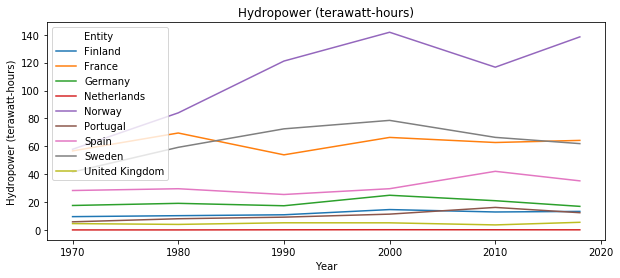

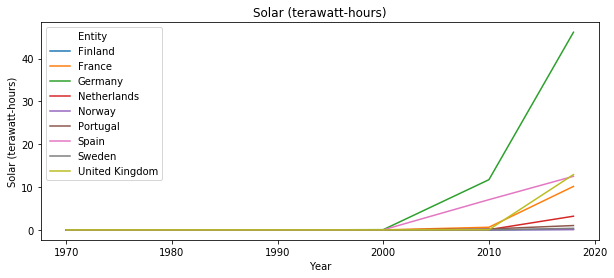

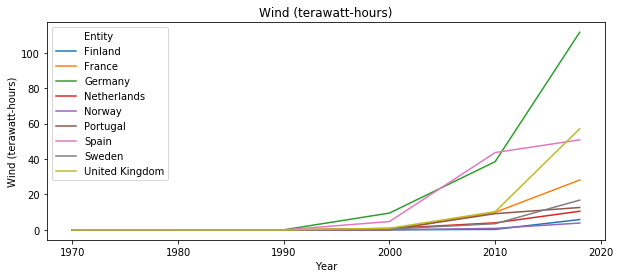

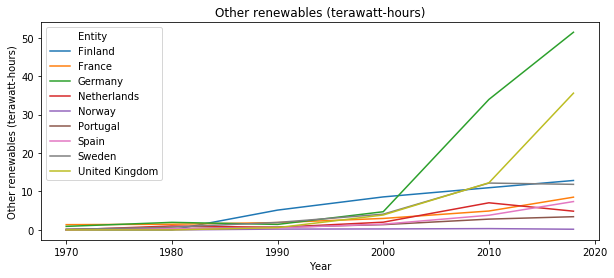

In [31]:
type_enr = ["Hydropower (terawatt-hours)", "Solar (terawatt-hours)", "Wind (terawatt-hours)", "Other renewables (terawatt-hours)"]

for t in type_enr:
    plt.figure(figsize=(10, 4))
    sns.lineplot(x="Year", 
                 y=t, 
                 hue="Entity",
                 data=temp_df)
    plt.title(t)

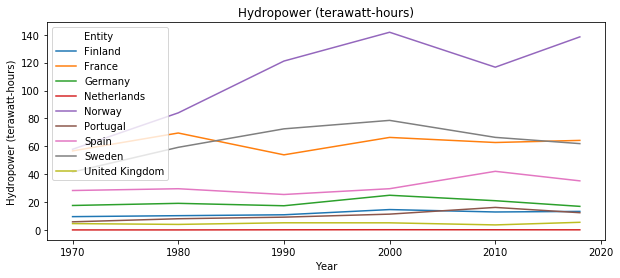

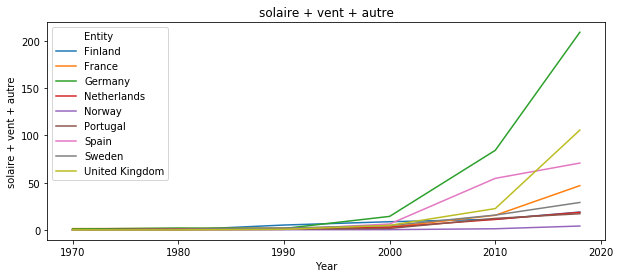

In [32]:
for t in ["Hydropower (terawatt-hours)", 'solaire + vent + autre']:
    plt.figure(figsize=(10, 4))
    sns.lineplot(x="Year", 
                 y=t, 
                 hue="Entity",
                 data=temp_df)
    plt.title(t)

---

# Conclusions



Avant 70 toutes les années ne sont pas représentés et on peut douter de la fiabilité des données avant cette date : pour s'en assurer il faudrait mener une enquête sur la provenance des données , comment elles ont été collectés etc... . 

Dans notre analyse nous avons gardé les années après 1970 car de toute façon l'intérêt pour les EnR commence après les années 2000.

L'énergie hydraulique reste de loin le type d'EnR la plus consommée. Ce qui a toujours été le cas historiquement. Néanmoins, on constate une diversification des EnR, la proportion d'hydro diminue au profit de nouvelles sources : le solaire et l'éolien n'ont décollés que récemment ! 

Nous avons mis en valeur le fait que la diversification des sources d'EnR se fait partout, mais plus vite en Europe et en Amerique du Nord, l'Asie rattrape son retard. L'Afrique et l'Amérique du Sud sont à la traine...

En revanche l'asie n'a commencé à vraiment exploiter le potentiel de l'hydro que tardivement (vers les années 2000). De même le solaire et l'éoliein n'ont vraiment commencés à être utiliser qu'à partir de 2010 mais avec une progression assez nette / dynamique surtout en asie. En revanche les autres EnR ne sont consommés qu'en Asie et en Europe...

Si l'on s'attarde sur l'Europe :
On observe de grandes disparités selon les pays : certains pays consomment toujours très peu d'EnR (il peut s'agit de petits pays ou "relativmeent" moins développés), et des pays qui ont très fortement misés sur les EnR depuis les années 2000

- Pour l'énergie hydraulique, seule la norvège a continuellement augmenté sa consommation jusqu'au années 2000. 
- Pour les autres pays la consommatation d'hydropower est restée relativement stable. 
- Pour les autres types d'énergie, on constate clairement que l'Allemagne et l'Espagne (dans une moindre mesure) ont 10 ans d'avance, la France et l'UK tente de rattraper leur retard à partir de 2010 :